In [1]:
import pandas as pd
titanic = pd.read_csv('C:/Users/INCENDIO/Desktop/dataset/train.csv') 

In [2]:
titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

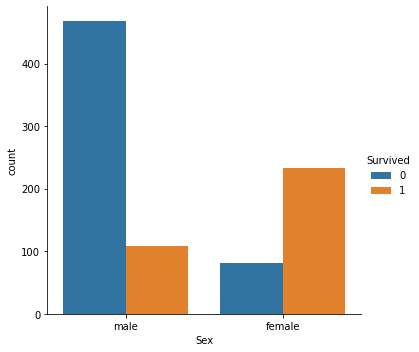

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Countplot 
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = titanic) 

# Pclass (Ordinal Feature) vs Survived

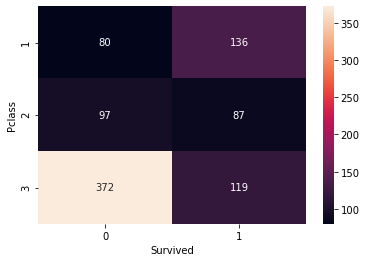

In [5]:
group = titanic.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

# Age (Continuous Feature) vs Survived

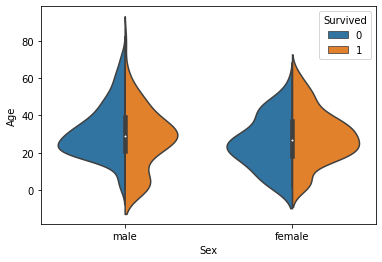

In [6]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = titanic, split = True) 

# Factor plot for Family_Size (Count Feature) and Family Size.

C:\Users\INCENDIO\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\INCENDIO\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


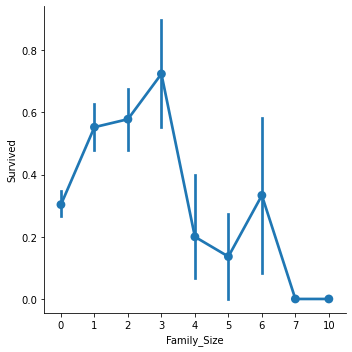

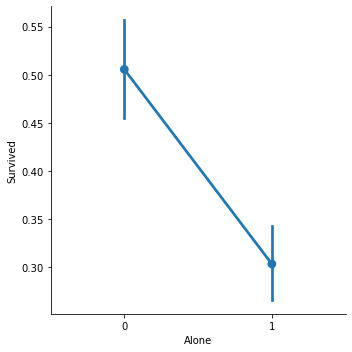

In [7]:
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp'] 
  
# Adding a column Alone 
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = titanic) 

# Bar Plot for Fare (Continuous Feature)

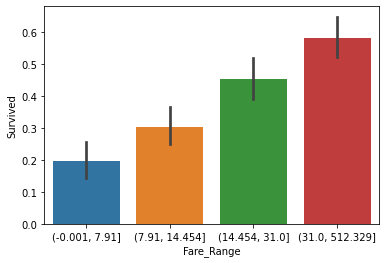

In [8]:
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived',  
data = titanic) 

# Categorical Count Plots for Embarked Feature

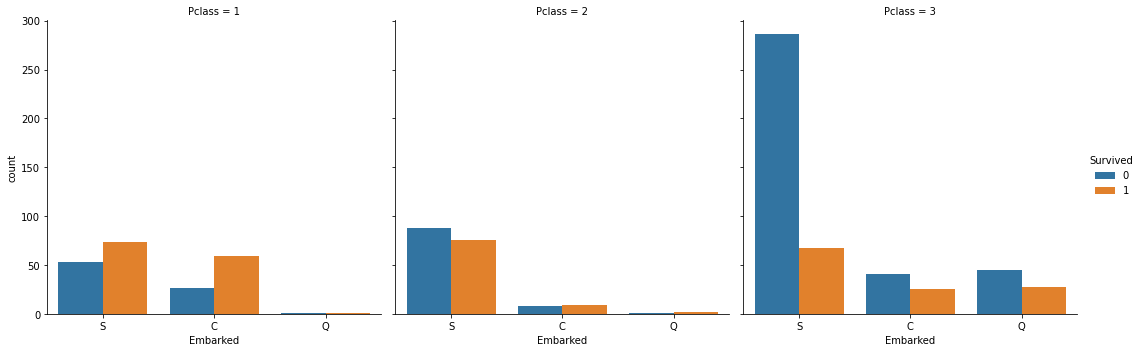

In [9]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = titanic) 